In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

First I Upload the dataset and check for missing values.

In [150]:
customers=pd.read_excel('..\Data\raw\creditcardmarketing.xlsx')
customers.isna().sum()


OSError: [Errno 22] Invalid argument: '..\\Data\raw\\creditcardmarketing.xlsx'

secondly, I drop any customer ID column, and standardize the column names, dropping rows with missing values in average balance, as this will most likely covers NaN in other columns

In [ ]:
customers.drop('Customer Number',axis=1,inplace=True)
cols_std=[i.replace(' ','_').lower() for i in customers.columns]
customers.rename(columns=dict(zip(customers.columns,cols_std)),inplace=True)
customers.drop(customers[customers['average_balance'].isna()].index,axis=0,inplace=True)

In [ ]:
customers.isna().sum() #

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

My target will be whether the offer is accepted or not, to be able to predict whether a client will accept the offer.

In [ ]:
y=customers['offer_accepted']
X=customers.drop('offer_accepted',axis=1)
cols_std.remove(y.name)

I will create this functions file to call in the future in case necessary.
 

In [ ]:
%%writefile functions.py
import pandas as pd
import numpy as np
    
def pctbygroup(df,y):
    '''this function will provide a dictionary of dataframes with the percentage of frequency of values of column if less than 10 y aggregated by each column that corrresponds to the key of the dictionary'''
    cols=[c for c in df.columns if c!=y]
    dfs={}
    for i in cols:
        dfs[i]=df.groupby(i)[y].value_counts().to_frame().div(df.groupby(i).agg('count')[y].to_frame(),level=i).rename(columns={y:'%'}).sort_values('%')*100
    return dfs
    
def countbygroup(df,y):
    '''this function will provide a dictionary of dataframes  of value counts of column 'y' aggregated by each of the other columns, being that each key will correspond to the column used to aggregate by'''
    cols=[c for c in df.columns if c!=y]
    pds={}
    for i in cols:
        pds[i]=df.groupby(i)[y].value_counts()     
    return pds





Overwriting functions.py


In [ ]:
import functions


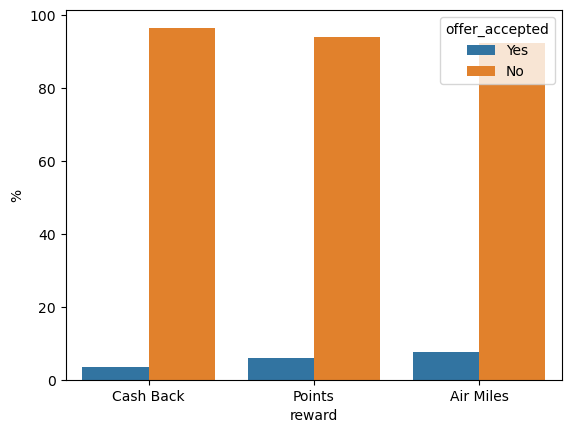

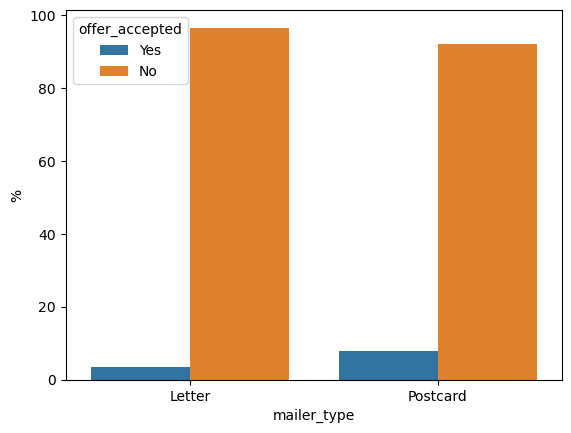

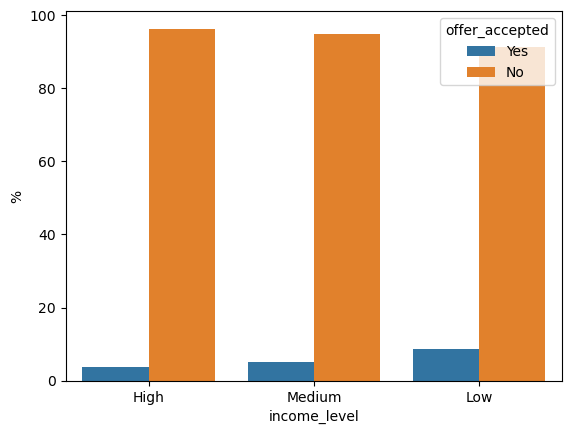

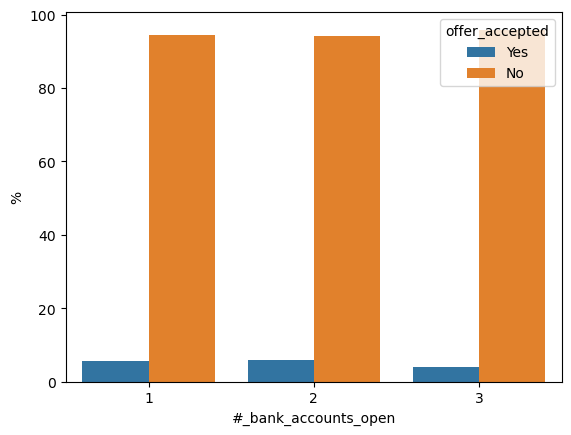

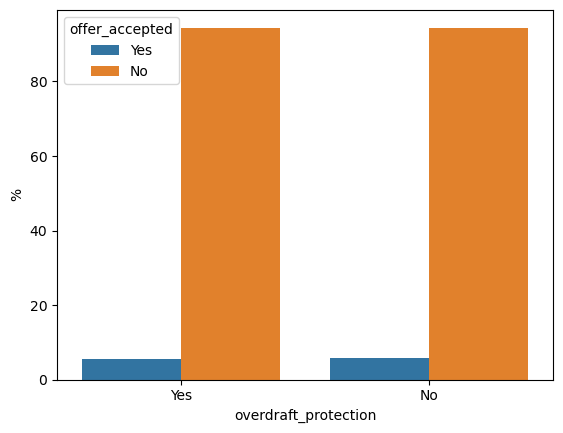

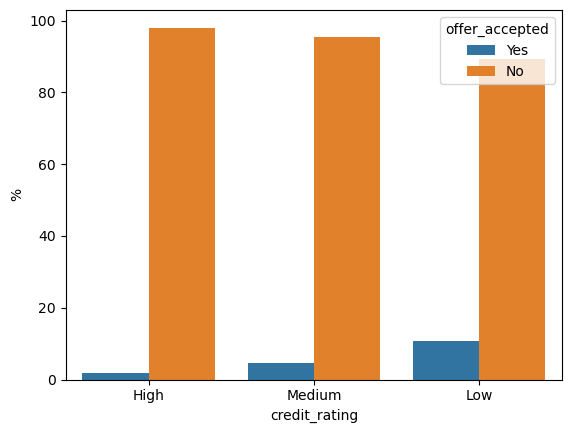

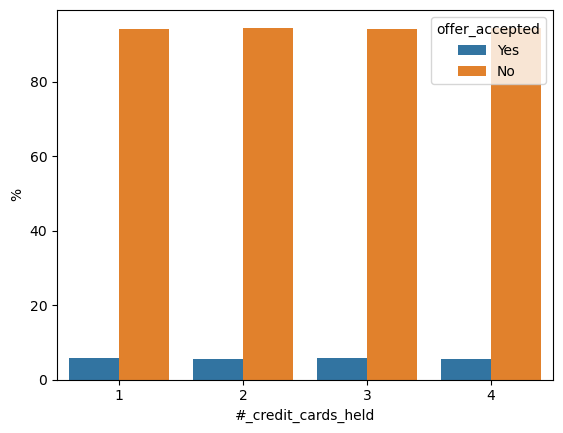

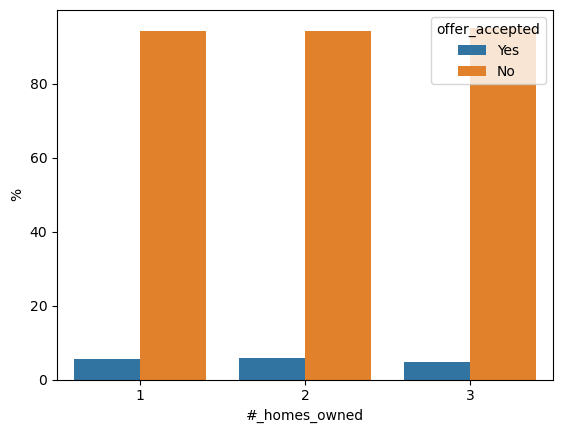

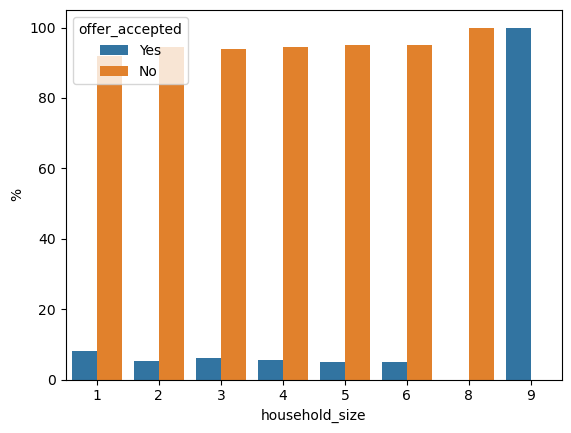

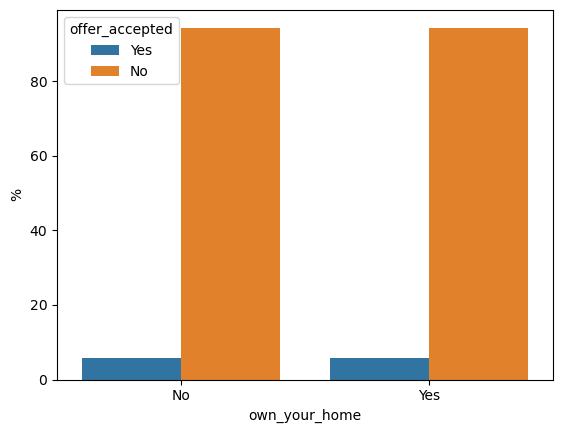

In [ ]:
for key,df in functions.pctbygroup(customers,'offer_accepted').items():
    if customers[key].nunique()<10:
        sns.barplot(data=df.reset_index(), x=df.reset_index()[key],y='%',hue='offer_accepted')
        plt.show()

In [ ]:
for i in functions.countbygroup(customers,'offer_accepted').values():
    display(i.to_frame())

offer_accepted
reward    offer_accepted                
Air Miles No                        5584
          Yes                        463
Cash Back No                        5789
          Yes                        206
Points    No                        5582
          Yes                        352

offer_accepted
mailer_type offer_accepted                
Letter      No                        8542
            Yes                        300
Postcard    No                        8413
            Yes                        721

offer_accepted
income_level offer_accepted                
High         No                        4354
             Yes                        165
Low          No                        4068
             Yes                        387
Medium       No                        8533
             Yes                        469

offer_accepted
#_bank_accounts_open offer_accepted                
1                    No                       12899
                     Yes                        775
2                    No                        3773
                     Yes                        234
3                    No                         283
                     Yes                         12

offer_accepted
overdraft_protection offer_accepted                
No                   No                       14427
                     Yes                        873
Yes                  No                        2528
                     Yes                        148

offer_accepted
credit_rating offer_accepted                
High          No                        5945
              Yes                        119
Low           No                        5315
              Yes                        633
Medium        No                        5695
              Yes                        269

offer_accepted
#_credit_cards_held offer_accepted                
1                   No                        5786
                    Yes                        361
2                   No                        7500
                    Yes                        433
3                   No                        3183
                    Yes                        198
4                   No                         486
                    Yes                         29

offer_accepted
#_homes_owned offer_accepted                
1             No                       13679
              Yes                        823
2             No                        3100
              Yes                        189
3             No                         176
              Yes                          9

offer_accepted
household_size offer_accepted                
1              No                         496
               Yes                         43
2              No                        2658
               Yes                        151
3              No                        5361
               Yes                        344
4              No                        5222
               Yes                        310
5              No                        2706
               Yes                        145
6              No                         511
               Yes                         27
8              No                           1
9              Yes                          1

offer_accepted
own_your_home offer_accepted                
No            No                        5980
              Yes                        360
Yes           No                       10975
              Yes                        661

,,offer_accepted
average_balance,offer_accepted,
48.25,No,1
56.00,No,1
62.00,No,1
63.50,No,1
71.25,No,1
...,...,...
2437.50,No,1
2609.50,No,1
2738.50,No,1


offer_accepted
q1_balance offer_accepted                
0.0        No                           5
1.0        No                          10
2.0        No                           9
           Yes                          1
3.0        No                           3
...                                   ...
2435.0     No                           1
2453.0     No                           1
2502.0     No                           1
2509.0     No                           1
3450.0     No                           1

[2944 rows x 1 columns]

,,offer_accepted
q2_balance,offer_accepted,
0.0,No,1
1.0,No,3
2.0,No,10
3.0,No,5
4.0,No,5
...,...,...
2445.0,No,1
2918.0,No,1
3214.0,No,1


,,offer_accepted
q3_balance,offer_accepted,
0.0,No,1
1.0,No,5
2.0,No,3
3.0,No,6
4.0,No,9
...,...,...
2761.0,No,1
2802.0,No,1
2945.0,No,1


,,offer_accepted
q4_balance,offer_accepted,
0.0,No,5
1.0,No,2
2.0,No,8
3.0,No,3
4.0,No,11
...,...,...
3178.0,No,1
3191.0,No,1
3201.0,No,1


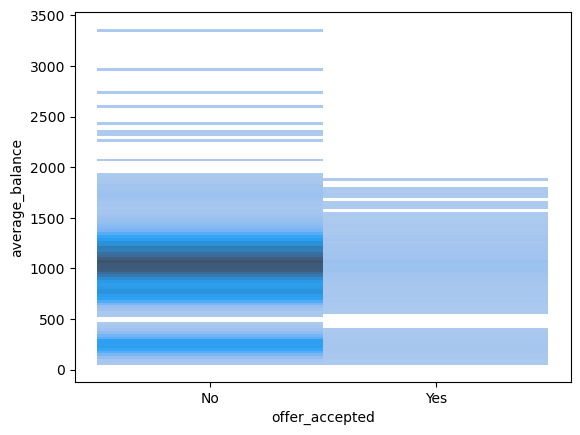

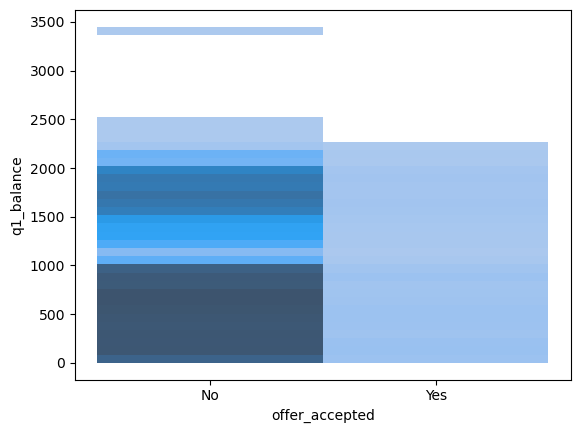

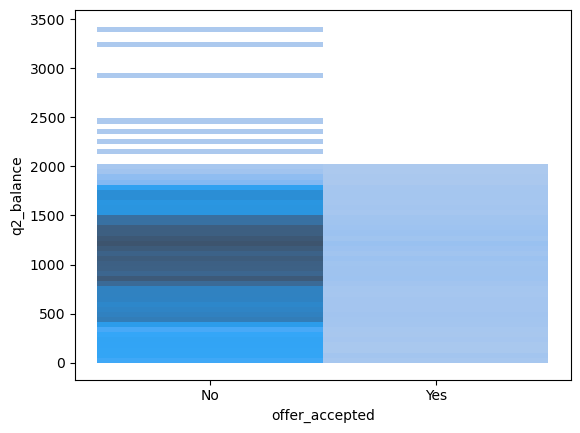

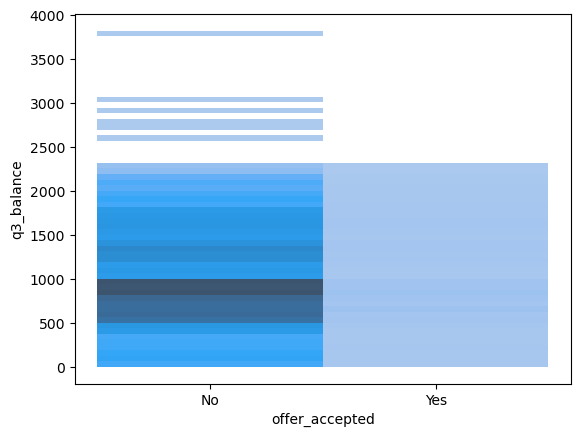

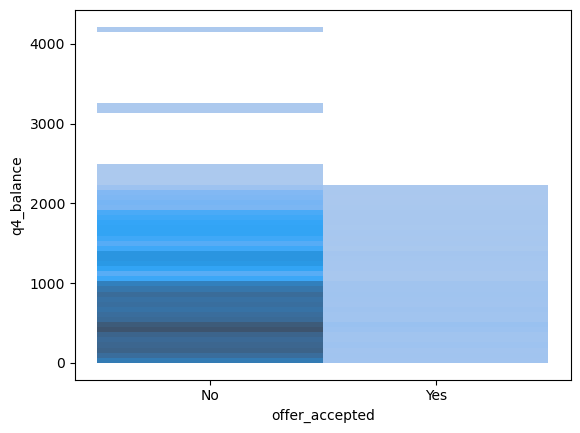

In [142]:
for i in customers.columns:
    if 'balance' in i:
        sns.histplot(data=customers,y=i,x=y)
        plt.show()


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [131]:
X_num,X_cat=X._get_numeric_data(),X.select_dtypes('object')

In [134]:
X_cat

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...
17995,Cash Back,Letter,High,No,Low,Yes
17996,Cash Back,Letter,High,No,Low,Yes
17997,Cash Back,Letter,High,No,Low,No
17998,Cash Back,Letter,Medium,No,Medium,Yes
